<h1><center> Make Scorer : </center></h1>

Parfois il faut construire notre propre outil de mesure, surtout dans le secteur industriel. En effet, parfois notre client s'en fiche de MSE ou de l'accuracy...etc, mais dans le cahier de charge il y a des outils **`précises`** pour mesurer la performance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

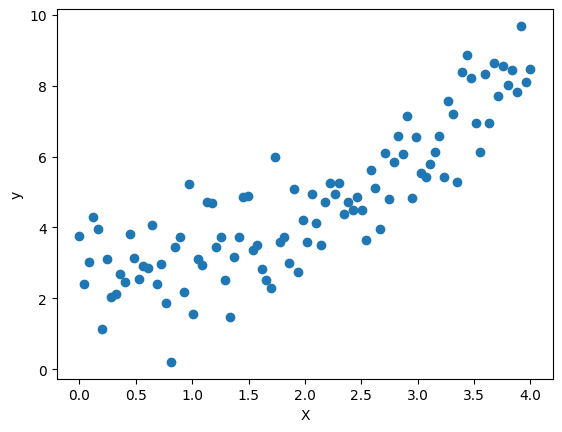

In [2]:
np.random.seed(0)
m=100
X=np.linspace(0,4,m).reshape((m,1))
y=2+ X**1.3 + np.random.randn(m,1)
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')

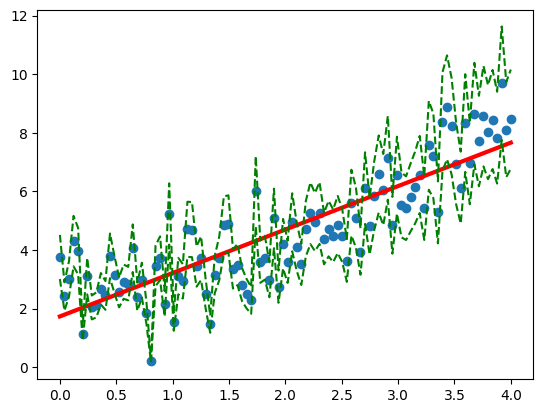

In [3]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X,y)
y_pred=model.predict(X)

plt.scatter(X,y)
plt.plot(X,y_pred,c='r',lw=3)
plt.plot(X,y+y*0.2,c='g',ls='--')
plt.plot(X,y-y*0.2,c='g',ls='--')

In [4]:
def custom_metric(y,y_pred) :
    return np.sum((y_pred<y+y*0.2) &(y_pred>y-y*0.2))/y.size

#par exemple cette fct nous calcule le pourcentage de combien de 
#points rentre dans le segment de 20%

custom_metric(y,y_pred)

0.63

In [5]:
from sklearn.metrics import make_scorer

<center><img src='Make_scorer .png' height='300' width='500' alt='Make scorer function'></center>

In [6]:
custom_score=make_scorer(custom_metric,greater_is_better=True)

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=3,scoring=custom_score)

array([0.08823529, 0.42424242, 0.3030303 ])